# Rotation kernels of mixed modes and rotational splitting caused by core rotation

Computation of rotation kernel and frequency splitting of the solar mixed mode found at ell = 4 (between Lamb-like and g5 modes, calculated for m = 4). It is compared to the l=m=1 and n=5 p-mode.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "figure.figsize": (4,4)
})

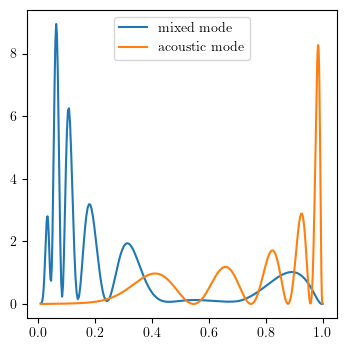

In [2]:
### Computation of kernels

#amplitudes of linear modes previously computed with Dedalus
r,xi_r_mixed,xi_h_mixed,xi_r_acoustic,xi_h_acoustic = np.load("mixedMode_acousticMode_forKernels.npy")

r     = r.real
colat = np.linspace(0.001,np.pi-0.001,len(r))
x     = np.cos(colat)

### mixed mode l=m=4 kernel
xi_r_scaled,xi_h_scaled = xi_r_mixed.imag,xi_h_mixed.real
m      = 4
P44    = 3/16*np.sqrt(35)*(-1+x**2)**2  #legendre polynomial
dP44dx = 3/4*np.sqrt(35)*x*(-1+x**2)
I = np.trapz(xi_r_scaled**2 + 4*5*xi_h_scaled**2, x = r)
K1 = (xi_r_scaled*(xi_r_scaled - 2*xi_h_scaled))[:,None]*(P44**2)
K2 = (xi_h_scaled**2)[:,None]*((dP44dx**2)*(1-x**2)-2*x*P44*dP44dx + (m**2)/(1-x**2)*(P44**2))

K_mixed = m/I*(K1+K2)

### acoustic l=m=1 kernel
xi_r_scaled,xi_h_scaled = xi_r_acoustic.imag,xi_h_acoustic.real
m      = 1
P11    = -np.sqrt(3)/2*np.sqrt(1-x**2)  #legendre polynomial
dP11dx = np.sqrt(3)/2*x/np.sqrt(1-x**2)
I = np.trapz(xi_r_scaled**2 + 1*2*xi_h_scaled**2, x = r)
K1 = (xi_r_scaled*(xi_r_scaled - 2*xi_h_scaled))[:,None]*(P11**2)
K2 = (xi_h_scaled**2)[:,None]*((dP11dx**2)*(1-x**2)-2*x*P11*dP11dx + (m**2)/(1-x**2)*(P11**2))

K_acoustic = m/I*(K1+K2)

### plot kernels
plt.plot(r,K_mixed[:,len(r)//2]/4,label="mixed mode")
plt.plot(r,K_acoustic[:,len(r)//2]/1,label="acoustic mode")
plt.legend()
plt.show()

In [4]:
### Compute splitting

Rcore = 0.2
Rconv = 0.7

# approximation of solar rotation as given by Thompson et al. 2003
OmegaSunKnown = np.zeros((len(r),len(r)))
yconv,zconv = np.meshgrid(colat,r[r>=Rconv])
OmegaSunKnown[(r>=Rcore)&(r<Rconv),:] = 2*np.pi*440e-9 #solid body rotation in the radiative zone
OmegaSunKnown[(r>=Rconv),:]           = 2*np.pi*1e-9*( 440*(1-zconv)/(1-Rconv) +(zconv-Rconv)/(1-Rconv)*(451.5 - 65.3*(np.cos(yconv))**2 -66.7*(np.cos(yconv))**4 ))

OmegaCore     = np.zeros((len(r),len(r)))
ycore,zcore = np.meshgrid(colat,r[r<Rcore])
OmegaCore[r<Rcore,:] = 2*np.pi*1e-9  #rotation of the core of 1 nHz


print("Splitting in frequency of the mixed mode due to radiative and convection regions rotation: ")
print(np.trapz(np.trapz(K_mixed*OmegaSunKnown, x = -x), x = r)/2/np.pi/1e-9," nHz")
print("Splitting in frequency of the mixed mode due to core rotation (of 1nHz): ")
print(np.trapz(np.trapz(K_mixed*OmegaCore, x = -x), x = r)/2/np.pi/1e-9," nHz")
print("Splitting in frequency of the acoustic mode due to core rotation (of 1nHz): ")
print(np.trapz(np.trapz(K_acoustic*OmegaCore, x = -x), x = r)/2/np.pi/1e-9," nHz")

Splitting in frequency of the mixed mode due to radiative and convection regions rotation: 
785.6730937809845  nHz
Splitting in frequency of the mixed mode due to core rotation (of 1nHz): 
2.241198351572535  nHz
Splitting in frequency of the acoustic mode due to core rotation (of 1nHz): 
0.07267480621352235  nHz
